# Data 정보
데이터 명세서
* Survived: 0 = No, 1 = Yes
* pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
* sibsp: # of siblings / spouses aboard the Titanic
* parch: # of parents / children aboard the Titanic
* ticket: Ticket number
* cabin: Cabin number : 객실, 선실
* embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [2]:
# 데이터 분석에 필요한 라이브러리들을 import
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import rc

%matplotlib inline

# 그래프를 격자 스타일로 (숫자 범위가 눈에 잘 띄도록 ggplot 스타일 사용.)
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제 해결을 위해
mpl.rcParams['axes.unicode_minus'] = False

# 경고 문구 무시
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
ls

 data/   scikit_learn.png*  'Titanic 1.ipynb'*


In [4]:
# data 폴더에 있는 train.csv 데이터 로드
train = pd.read_csv('./data/train.csv')

In [5]:
# head() / tail() / info() 탐색
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
# 직접 채워줘야 하는 데이터들
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
import missingno as msno

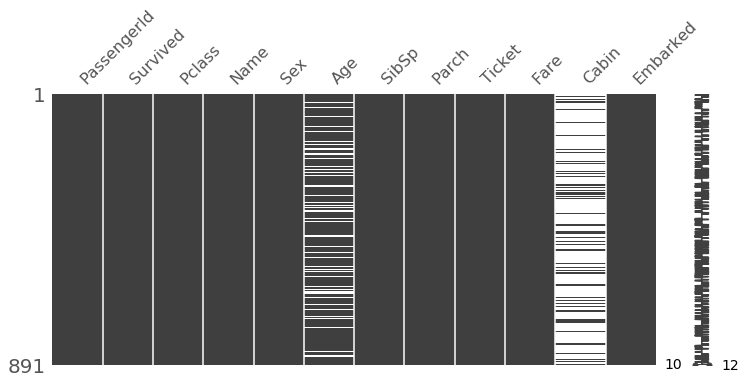

In [9]:
msno.matrix(train, figsize=(12,5))
# 맨오른쪽은 전체적으로 봤을때 빈공간을 보여주는 것 서로 어떻게 비어있는지

---

## 함수를 사용하여 값을 미리 라벨링하기

In [10]:
def labelling(x):
    if x == 0:
        return 'Dead'
    else:
        return 'Live'

In [11]:
LD = pd.Series(map(labelling, train['Survived']))
LD[:5]

0    Dead
1    Live
2    Live
3    Live
4    Dead
dtype: object

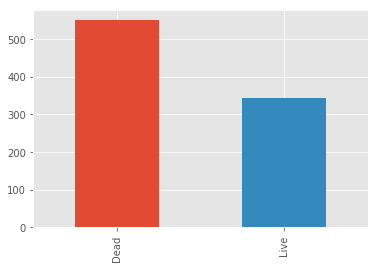

In [12]:
LD = pd.Series(map(labelling, train['Survived']))
LD.value_counts().plot(kind='bar')

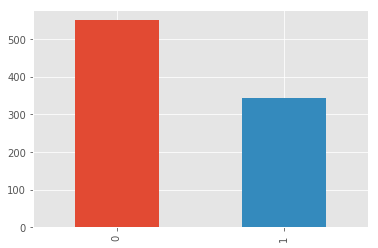

In [13]:
train.Survived.value_counts().plot(kind='bar')

In [14]:
survive = train['Survived']

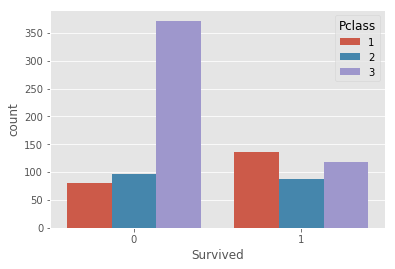

In [15]:
sns.countplot(x=survive, hue=train['Pclass'])

---

### pandas.DataFrame.plot

In [16]:
feature= "Pclass"
feature

'Pclass'

In [17]:
survived = train[train['Survived'] == 1] # 생존
survived.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [18]:
survived = train[train['Survived'] == 1][feature].value_counts()
survived

1    136
3    119
2     87
Name: Pclass, dtype: int64

In [19]:
dead =  train[train['Survived'] == 0][feature].value_counts()
dead

3    372
2     97
1     80
Name: Pclass, dtype: int64

In [20]:
[survived, dead]

[1    136
 3    119
 2     87
 Name: Pclass, dtype: int64, 3    372
 2     97
 1     80
 Name: Pclass, dtype: int64]

In [21]:
df= pd.DataFrame([survived, dead])
df

,1,2,3
Pclass,136,87,119
Pclass,80,97,372


In [22]:
df.index = ['Survived', 'Dead']
df

,1,2,3
Survived,136,87,119
Dead,80,97,372


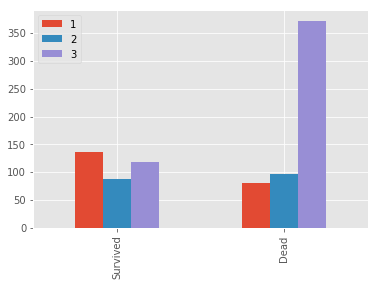

In [23]:
df.plot(kind='bar')

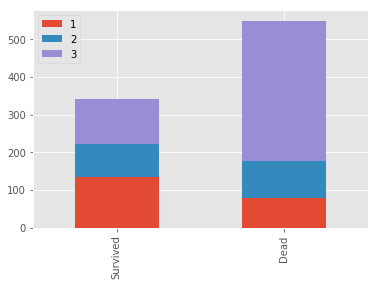

In [24]:
df.plot(kind='bar', stacked=True)

> https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.bar.html

> https://pandas.pydata.org/docs/dev/reference/api/pandas.DataFrame.plot.html?highlight=plot#pandas.DataFrame.plot

In [25]:
plt.rc('font', family='malgun gothic')
plt.rcParams['axes.unicode_minus']=False #음수 부호 깨짐 방지

In [26]:
# discrete 데이터들을 survive, dead 로 시각화.

def bar_chart(feature, ax=None):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead =  train[train['Survived'] == 0][feature].value_counts()
    df= pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar',stacked=True, ax=ax)

In [47]:
import matplotlib.font_manager as fm
fm._rebuild()

# # 한글 출력을 도와주는 코드입니다.
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')

# # seaborn의 countplot 함수를 사용하여 출력합니다.
sns.set(font='NanumGothic',
        rc={"axes.unicode_minus":False},
        style='darkgrid')

In [48]:
import matplotlib.font_manager as fm

fm._rebuild()

plt.rc('font', family = 'NanumGothic')

sns.set(font='NanumGothic', style='darkgrid')

[Text(0.5,1,'승선 장소')]

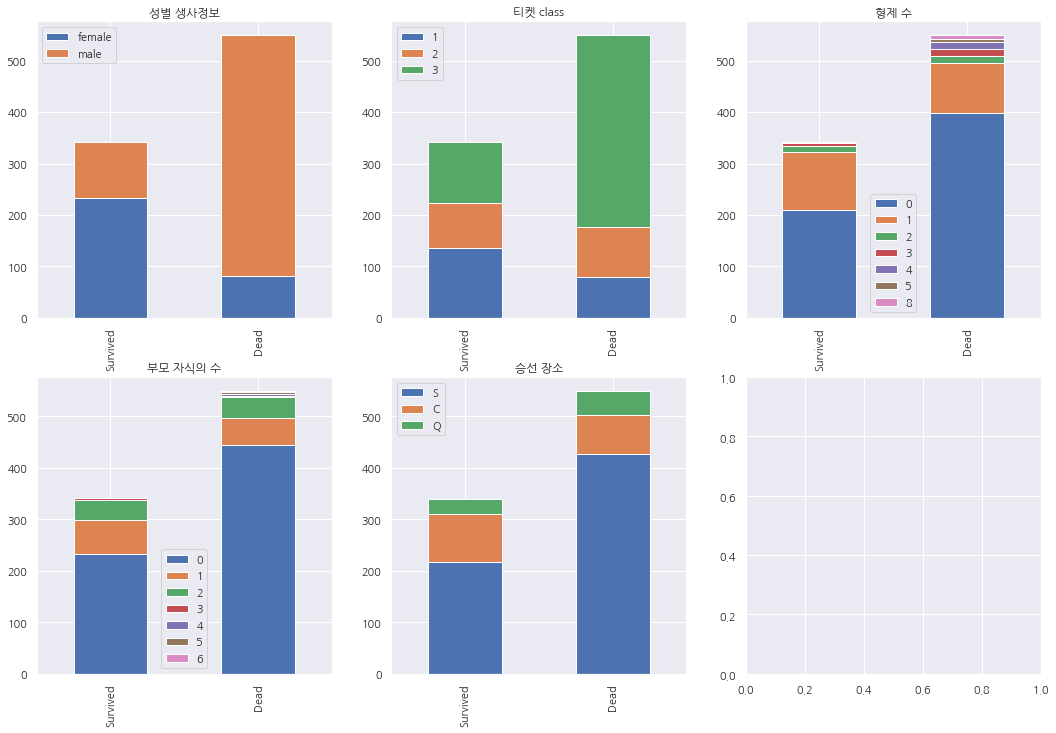

In [38]:
# subplots
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,12)

bar_chart('Sex', ax1)
bar_chart('Pclass', ax2)
bar_chart('SibSp', ax3)
bar_chart('Parch', ax4)
bar_chart('Embarked', ax5)

ax1.set(title="성별 생사정보") # axes 함수
ax2.set(title="티켓 class")
ax3.set(title="형제 수")
ax4.set(title="부모 자식의 수")
ax5.set(title="승선 장소")

# 데이터 시각화를 통한 데이터 분석

### 1. 성별

-> 남자의 경우 죽을 확률이 확연하게 큼을 확인할 수 있다.

### 2. 티켓 class 별

-> 티켓 가격이 높을수록 살아남을 확률이 크다.

### 3,4. 형제 , 부모/자식

-> 형제, 부모/자식이 없는 경우 죽을 확률이 크다.

### 5. 승선장소
-> C 승선장 Cherbourg에서 탄 사람이 살아남은 수가 크다.

### step by step

In [40]:
feature

'Pclass'

In [41]:
train[feature].max()

3

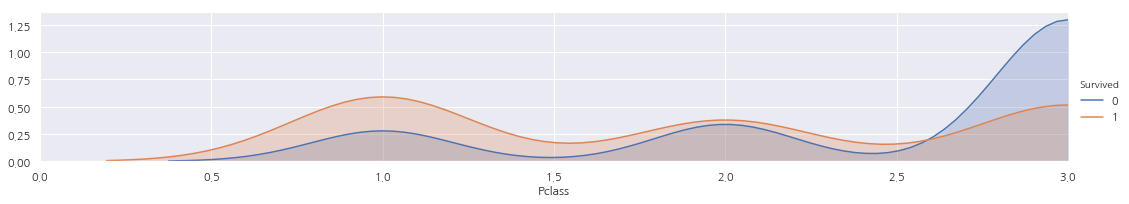

In [42]:
facet = sns.FacetGrid(train, hue="Survived", aspect =5)
facet.map(sns.kdeplot, feature, shade=True)
facet.set(xlim=(0, train[feature].max()))
facet.add_legend()

In [28]:
# continous 데이터 분석
## 명목형을 가지는 값은 불가능

def draw_facetgrid(feature):
    facet = sns.FacetGrid(train, hue="Survived", aspect=5) # 그리드(Grid)만 선언(배경) aspect = 가로 크기 조정
    facet.map(sns.kdeplot, feature, shade=True) 
    facet.set(xlim=(0, train[feature].max())) #  train[feature].max() -> 3 Pclass
    # survived 라벨을 표시.
    facet.add_legend() 
    plt.show()


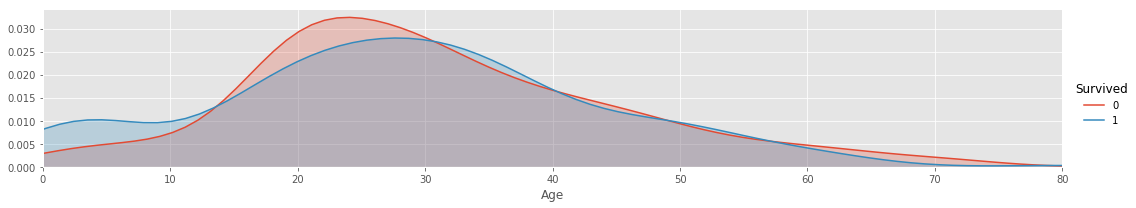

In [29]:
draw_facetgrid("Age")

### 10 이하의 경우 살 확률이 크고, 10대 중반에서 30 살까지는 죽을 확률이 더큼. 나머지 데이터는 큰 의미가 없음.

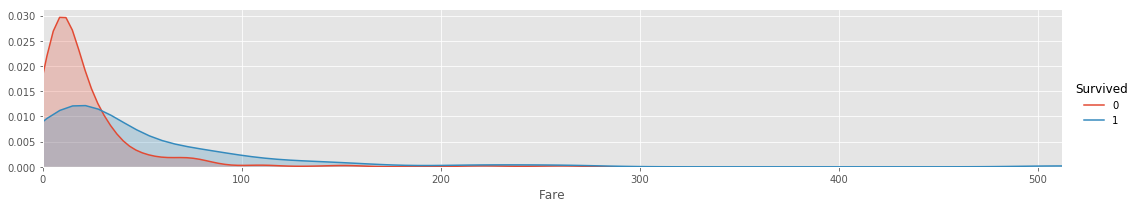

In [30]:
draw_facetgrid("Fare")

In [45]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs


In [49]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Sir           1
Capt          1
Ms            1
Countess      1
Mme           1
Jonkheer      1
Don           1
Lady          1
Name: Title, dtype: int64

### 전에 pclass 데이터로 확인한 것처럼 비싸게 표를 산 사람들이 살 확률이 더 높음.

In [31]:
# name 분석

for data in [train]:
    data["Title"] = data["Name"].str.extract('([A-Za-z]+)\.', expand=False)

---

### step by step

In [52]:
data = train
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [51]:
data['Name'][0:5]

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [54]:
data['Name'].str

---

## ! df['colum'].str ? 

#### 시리즈에서 -> string으로 변환

In [57]:
a = pd.Series(['A_Str_Series'])
a

0    A_Str_Series
dtype: object

타입은 시리즈인데, split을 이용하여 문자열을 분할하고 싶다면?

In [59]:
a.str.split('_')

0    [A, Str, Series]
dtype: object

In [60]:
s = pd.Series(['A_Str_Series', 'Kim_soo_yeon'])
s

0    A_Str_Series
1    Kim_soo_yeon
dtype: object

In [61]:
s.str.split('_')

0    [A, Str, Series]
1    [Kim, soo, yeon]
dtype: object

---

In [63]:
data['Name'].str

In [68]:
data['Name'].str.extract('([A-Za-z]+)\.', expand=False)[0:10] # 정규표현식을 만족하는 항목을 추출한다

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Name, dtype: object

In [32]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Sir           1
Capt          1
Ms            1
Countess      1
Mme           1
Jonkheer      1
Don           1
Lady          1
Name: Title, dtype: int64

#### 새로운 컬럼으로 붙이기

In [69]:
# name 분석

for data in [train]:
    data["Title"] = data["Name"].str.extract('([A-Za-z]+)\.', expand=False)

### 정규표현식

#### 정규표현식
- [  ] : 단일문자
- A-Z : 대문자 알파벳
- a-z : 소문자 알파벳
- '+' : 하나 또는 둘 이상
- **'\.'** : '.' 문자 (온점)


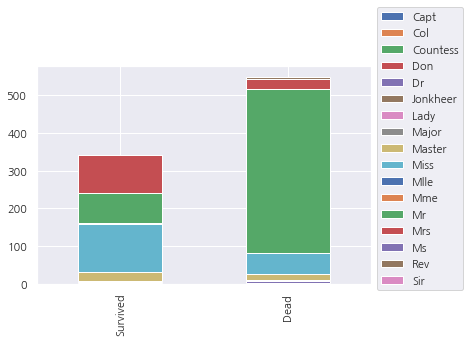

In [87]:
bar_chart("Title")
plt.legend(bbox_to_anchor=(1., 1.3))

In [94]:
train['Cabin'].head()

0    NaN
1      C
2    NaN
3      C
4    NaN
Name: Cabin, dtype: object

In [91]:
# Cabin 데이터 분석

train.Cabin.value_counts()

for dataset in [train]:
    dataset['Cabin'] = dataset['Cabin'].str[:1] # == str[0] 같음 = 선실의 앞글자 첫번째 글자

In [92]:
train.Cabin.value_counts()
# cabin 개수 확인

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

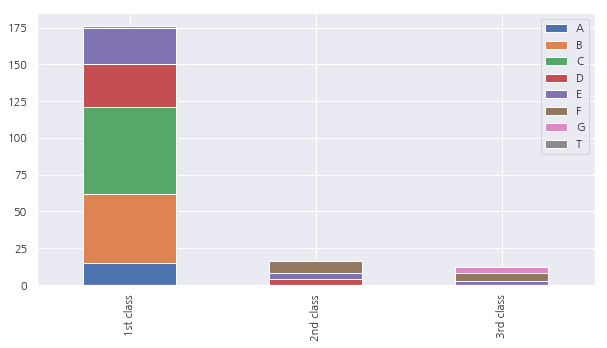

In [98]:
# Pclass 별로 cabin 확인해보기.
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [99]:
df

,A,B,C,D,E,F,G,T
1st class,15.0,47.0,59.0,29.0,25.0,NaN,NaN,1.0
2nd class,NaN,NaN,NaN,4.0,4.0,8.0,NaN,NaN
3rd class,NaN,NaN,NaN,NaN,3.0,5.0,4.0,NaN
